In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
### importando datos
df = pd.read_csv("C:/Users/jctor/OneDrive/Escritorio/prueba_ds/data/Data.csv")
print(df.shape)
df.head()

(1613562, 11)


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1554778161164,7.585,206.000000,0.854950,9.652863,-0.682571,0.009521,-0.030655,0.027252,432.0,17.690000
1,592705486931,10.000,61.336914,0.003738,-11.494394,-2.562900,-0.004217,0.012375,0.029961,531.0,13.070000
2,1288490188801,6.000,298.000000,-0.931373,9.862018,5.674431,-0.062343,-0.539092,0.105505,596.0,14.052768
3,369367187514,4.376,0.000000,-1.383849,8.075643,4.765658,0.010731,-0.077926,-0.054265,376.0,0.000000
4,1194000908321,3.900,299.000000,0.811659,9.447808,1.807678,-0.079931,-0.118189,-0.056884,757.0,12.618248


### Variables:
* bookingID	: indetificado del viaje
* Accuracy: EXactitud GPS en Metros
* Bearing: Dirección del movimiento en grados
* acceleration_x: mide aceleracion lineal (valores + es acelearion y valores negativos y freno)
* acceleration_y: mide acelearion en el eje y (izquierda y derecha)
* acceleration_z: Aceleración en el eje z (arriba o abajo, ayuda a detectar huecos, baches)
* gyro_x: indica inclinaciones hacia adelante o hacia atras
* gyro_y: indica inclinación hacia los lados
* gyro_z: indica rotacion horizontal(giros del vehículo)
* Second: indica el tiempo en segundos desde el inicio del viaje
* speed: velocidad del vehículo



In [20]:
### Revisando  analisis exporatorio de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613562 entries, 0 to 1613561
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bookingID       1613562 non-null  int64  
 1   Accuracy        1613562 non-null  float64
 2   Bearing         1613562 non-null  float64
 3   acceleration_x  1613562 non-null  float64
 4   acceleration_y  1613562 non-null  float64
 5   acceleration_z  1613562 non-null  float64
 6   gyro_x          1613562 non-null  float64
 7   gyro_y          1613562 non-null  float64
 8   gyro_z          1613562 non-null  float64
 9   second          1613562 non-null  float64
 10  Speed           1613562 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 135.4 MB


In [21]:
df.isnull().sum()   

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
dtype: int64

### Muestra
Se ejecutará una muestra del 20% con el objetivo de poder realizar de manera correcta el EDA y principales graficos para analisis del modelo

In [13]:
df_sample = df.sample(frac=0.20, random_state=42)
df_sample.shape

(322712, 11)

In [14]:
print(df_sample.shape)
df_sample.head()

(322712, 11)


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
97973,171798691863,3.931,357.000000,-0.349564,9.622590,0.031126,0.036720,-0.013416,-0.028469,509.0,0.000000
404710,1047972020277,6.000,178.271930,1.216292,7.755056,0.828419,0.065474,-0.019547,0.007330,1104.0,19.102821
409767,386547056816,3.900,75.000000,-0.375901,9.213169,-0.198725,-0.048817,-0.063093,0.080381,987.0,22.257120
1124496,335007449247,4.000,217.533478,-1.181934,-6.971075,-5.221353,0.054250,-0.009374,0.064610,81.0,3.853949
922101,764504178819,5.432,315.000000,0.562655,8.633755,2.588211,0.062792,-0.246887,0.045682,478.0,0.000000


In [23]:
p10_ax = df_sample['acceleration_x'].quantile(0.10)
p90_ax = df_sample['acceleration_x'].quantile(0.90)
p90_gz = df_sample['gyro_z'].abs().quantile(0.90)
p95_az = df_sample['acceleration_z'].abs().quantile(0.95)

print("Umbral frenada brusca (P10 ax):", p10_ax)
print("Umbral aceleración brusca (P90 ax):", p90_ax)
print("Umbral giro brusco (P90 |gz|):", p90_gz)
print("Umbral bache (P95 |az|):", p95_az)

Umbral frenada brusca (P10 ax): -1.2066777
Umbral aceleración brusca (P90 ax): 1.3312168
Umbral giro brusco (P90 |gz|): 0.09510787712166921
Umbral bache (P95 |az|): 6.92129155


In [15]:
df_sample.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,3.227120e+05,322712.000000,322712.000000,322712.000000,322712.000000,322712.000000,322712.000000,322712.000000,322712.000000,3.227120e+05,322712.000000
mean,8.174287e+11,11.773841,168.881803,0.070410,4.443064,0.890672,-0.001624,0.000543,0.000133,2.520980e+03,9.013901
std,4.945906e+11,88.625784,107.283776,1.416765,8.137292,3.261540,0.140954,0.319590,0.177556,1.090195e+06,8.102563
min,0.000000e+00,0.800000,0.000000,-27.158154,-45.706168,-45.551846,-7.510809,-21.249557,-15.417681,0.000000e+00,-1.000000
25%,3.865471e+11,3.900000,78.000000,-0.502953,-2.488655,-0.932657,-0.026878,-0.030091,-0.018649,2.410000e+02,1.038390
50%,7.988639e+11,4.273000,168.000000,0.062251,9.076416,0.769670,-0.000660,0.000240,-0.000006,5.200000e+02,7.540000
75%,1.245541e+12,8.000000,262.819443,0.634996,9.708784,2.753605,0.023213,0.031119,0.018293,8.630000e+02,15.473199
max,1.709397e+12,6063.000000,359.998535,24.459911,51.613052,51.980865,9.186859,32.485380,66.300780,6.193158e+08,38.027565


### Observacion de la distribucion de los datos:
* se observa que una aceleacion brusca es al rededor del percentil 90 , indicado un valor de 1.33
* Se observa que una frenada esta al rededor de -1.20
* Se encuentra que un giro brusco esta al rededor de 0.95 
* un bache que haya tomado el vehículo esta al rededor de  692

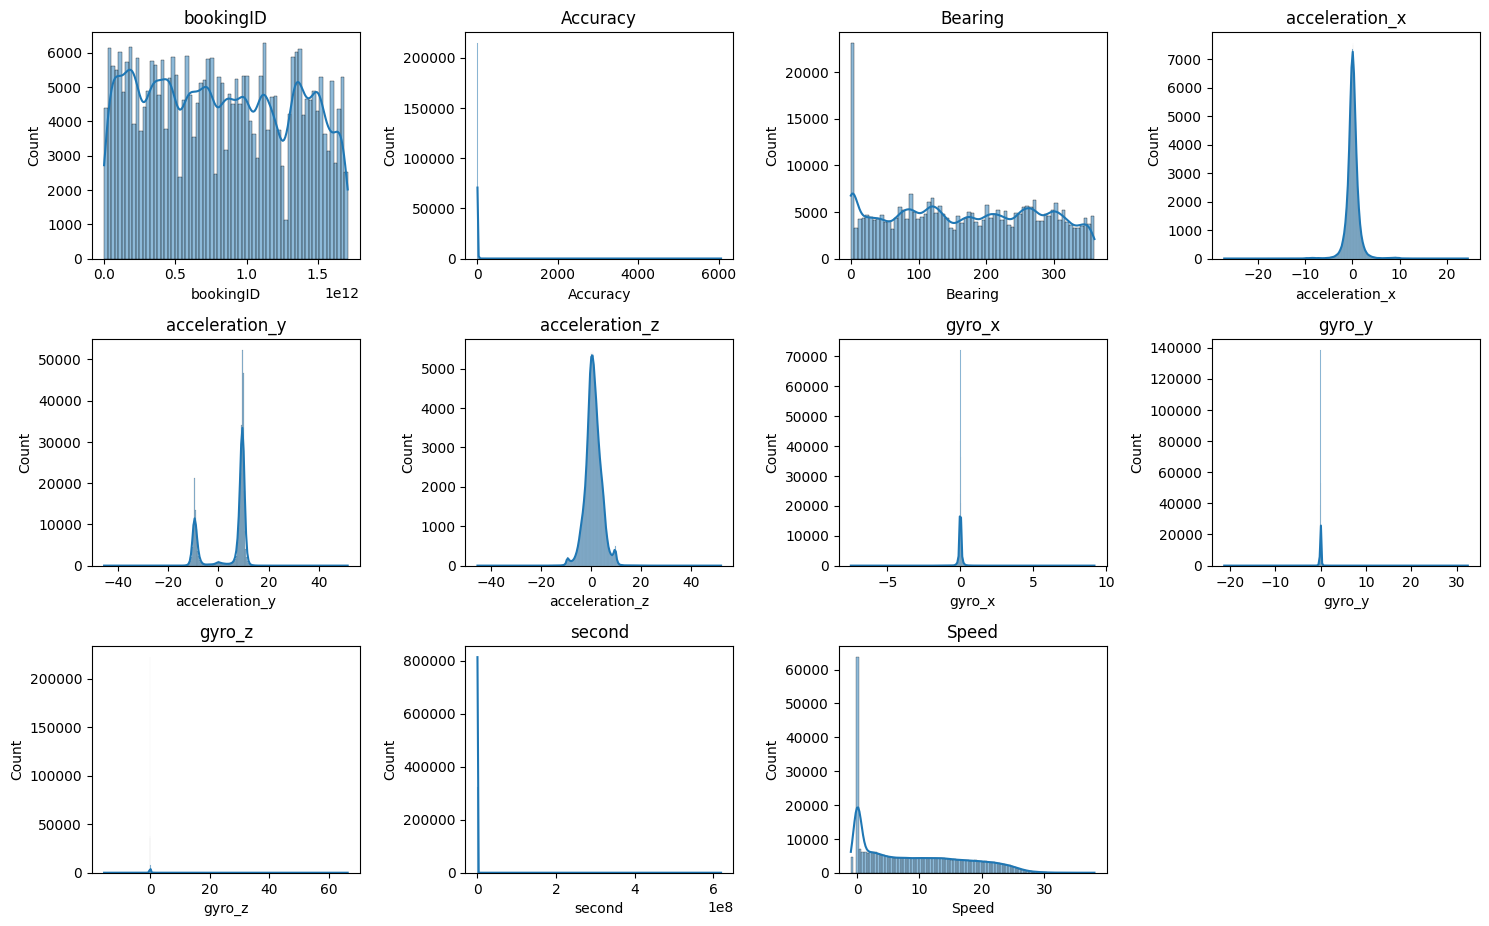

In [16]:
num_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_sample[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


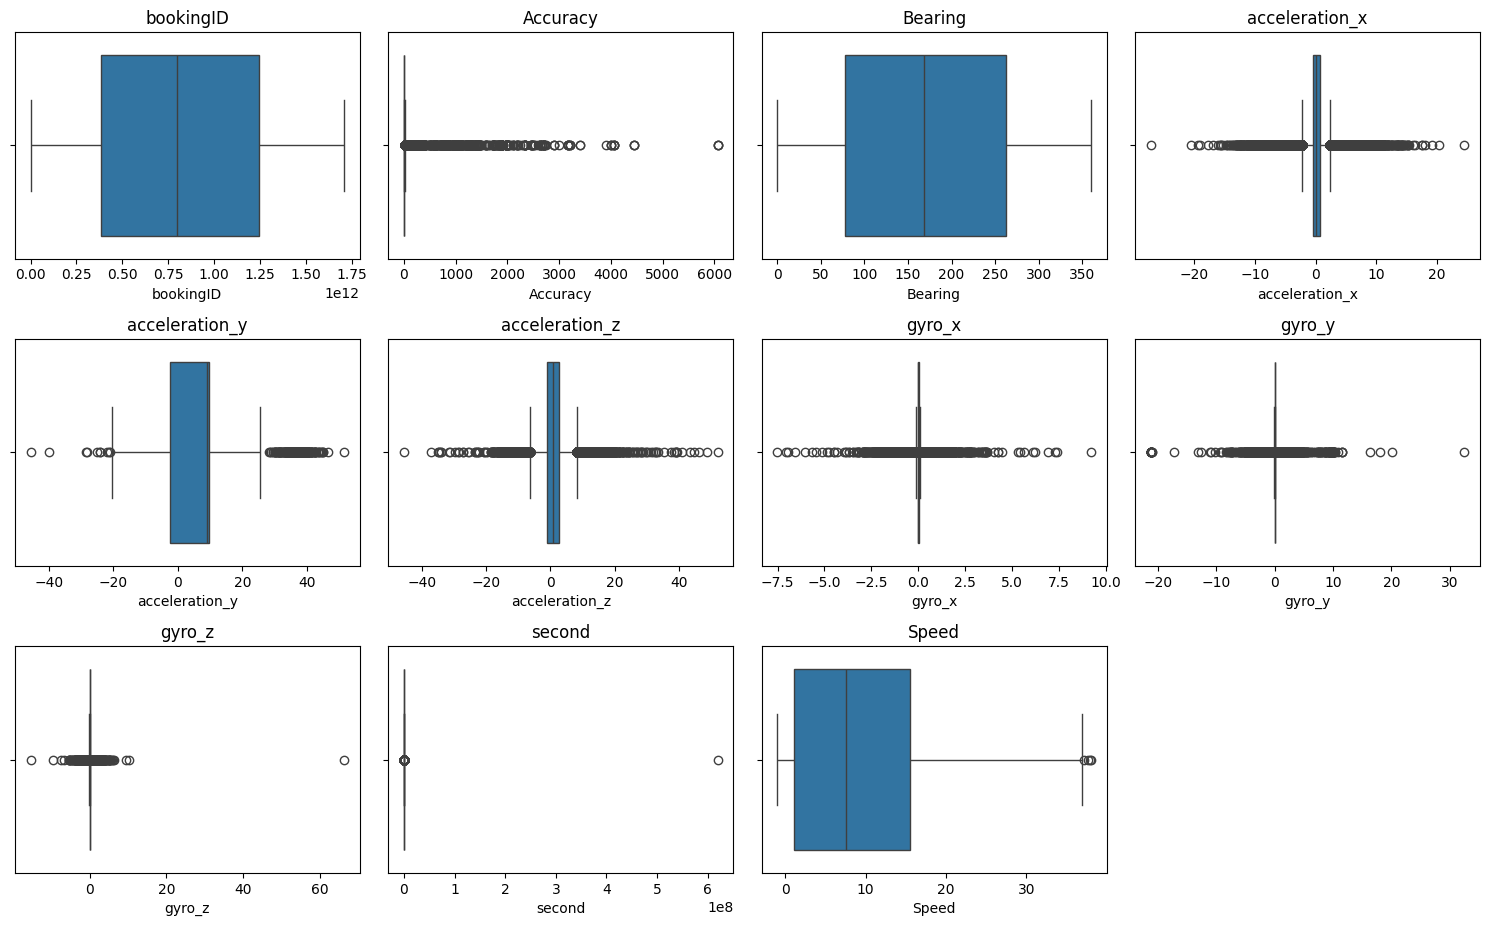

In [17]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_sample[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Primeros hallazgos
* Se encuentran variables con datos atípicos , algo normal a la hora de encontrar patrones de conducción. Por ejemplo, se evidencia que hay persona que conducen a alta velovidad , y otras con aceleraciones muy bruscas
* Se usará una combinacion de factores para poder generar una variable respuesta (Y)

## Creando variable objetivo rigurosa

In [30]:
df_sample['freno_brusco'] = (df_sample['acceleration_x'] < p10_ax).astype(int)
df_sample['aceleracion_fuerte'] = (df_sample['acceleration_x'] > p90_ax).astype(int)
df_sample['giro_inesperado'] = (df_sample['gyro_z'].abs() > p90_gz).astype(int)
df_sample['toma_hueco'] = (df_sample['acceleration_z'].abs() > p95_az).astype(int)

# Variable objetivo riesgosa
df_sample['prob_accidente'] = (
    (df_sample['freno_brusco'] == 1) |
    (df_sample['aceleracion_fuerte'] == 1) |
    (df_sample['giro_inesperado'] == 1) |
    (df_sample['toma_hueco'] == 1)
).astype(int)

In [32]:
print(df_sample.shape)
df_sample.head()    

(322712, 17)


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,freno_brusco,aceleracion_fuerte,giro_inesperado,toma_hueco,variable_respuesta,prob_accidente
97973,171798691863,3.931,357.000000,-0.349564,9.622590,0.031126,0.036720,-0.013416,-0.028469,509.0,0.000000,0,0,0,0,0,0
404710,1047972020277,6.000,178.271930,1.216292,7.755056,0.828419,0.065474,-0.019547,0.007330,1104.0,19.102821,0,0,0,0,0,0
409767,386547056816,3.900,75.000000,-0.375901,9.213169,-0.198725,-0.048817,-0.063093,0.080381,987.0,22.257120,0,0,0,0,0,0
1124496,335007449247,4.000,217.533478,-1.181934,-6.971075,-5.221353,0.054250,-0.009374,0.064610,81.0,3.853949,0,0,0,0,0,0
922101,764504178819,5.432,315.000000,0.562655,8.633755,2.588211,0.062792,-0.246887,0.045682,478.0,0.000000,0,0,0,0,0,0


In [29]:
df_sample.variable_respuesta.value_counts(normalize=True )

variable_respuesta
0    0.715508
1    0.284492
Name: proportion, dtype: float64

### Analissi multivariado

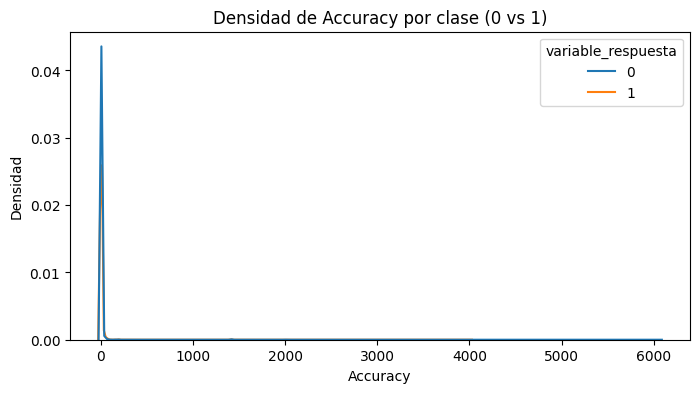

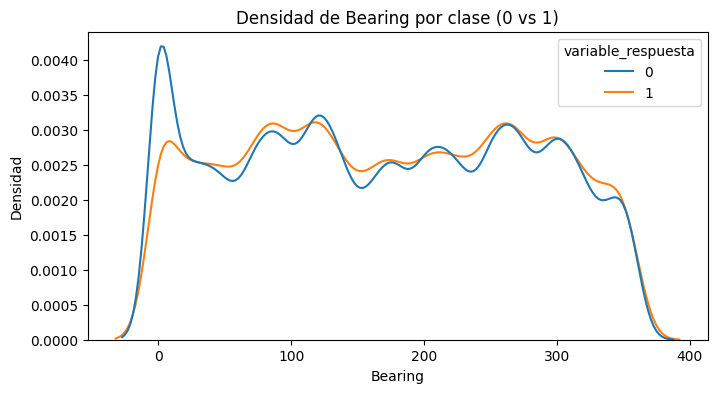

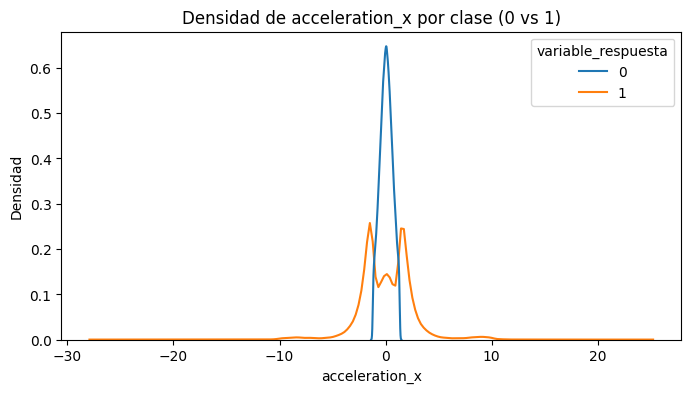

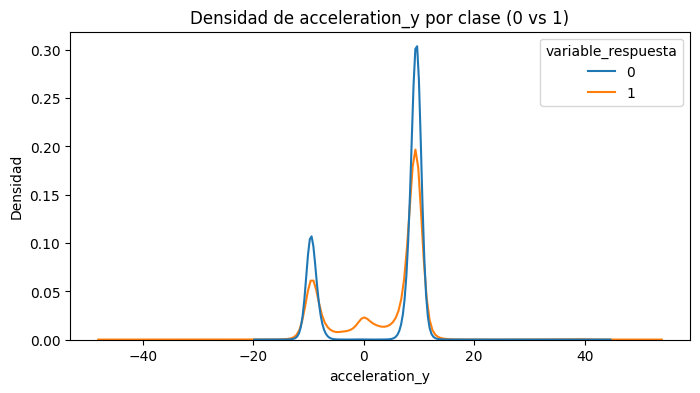

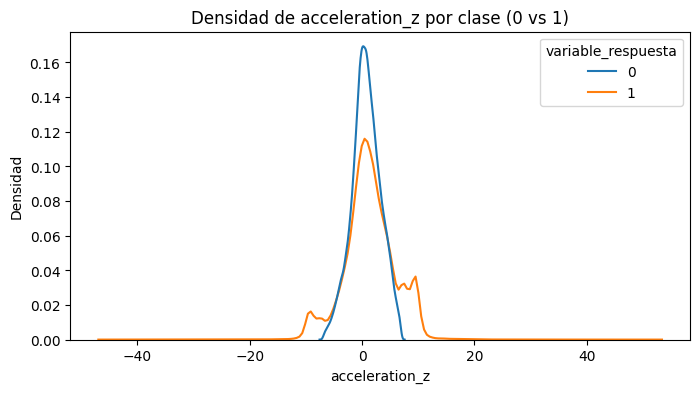

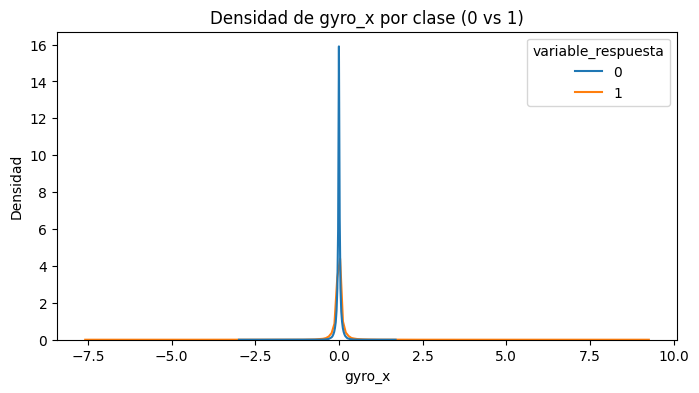

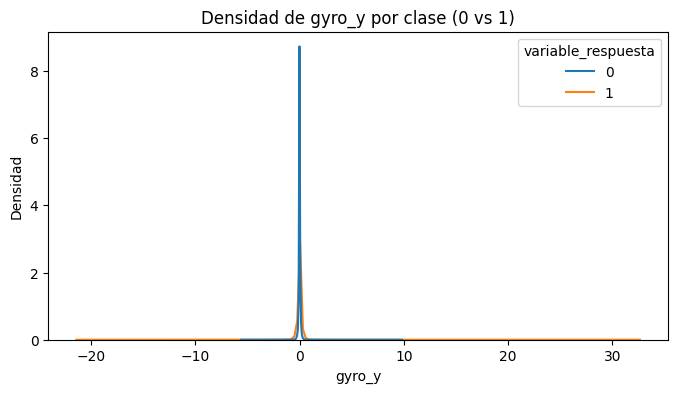

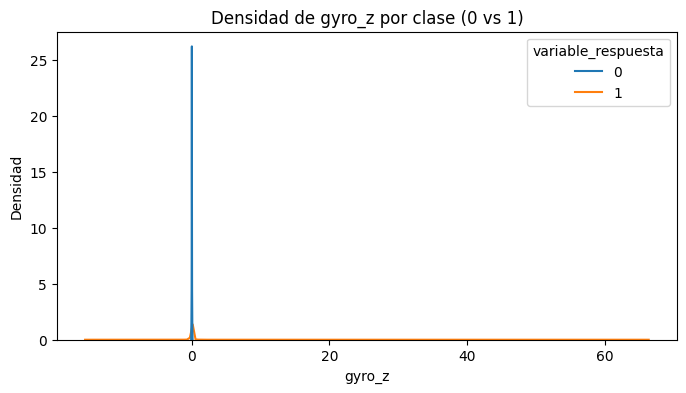

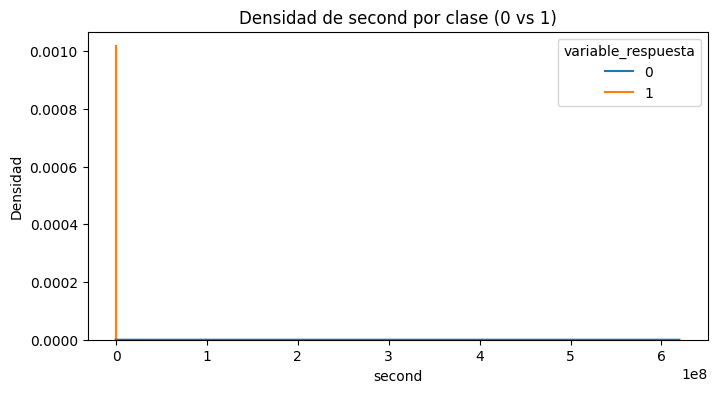

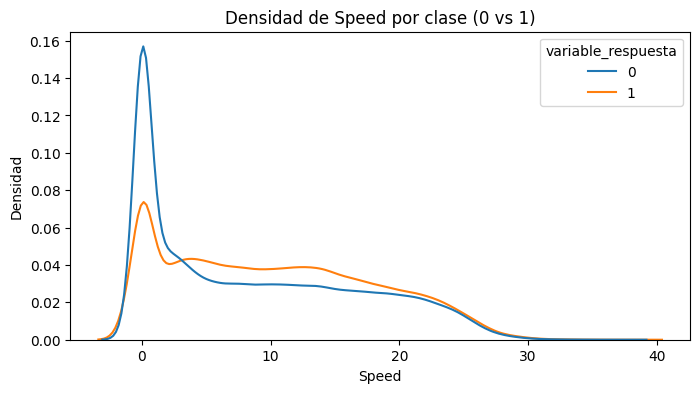

In [33]:


vars_num = [
    'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
    'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 
    'second', 'Speed'
]

for col in vars_num:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df_sample, x=col, hue='variable_respuesta', common_norm=False)
    plt.title(f"Densidad de {col} por clase (0 vs 1)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()


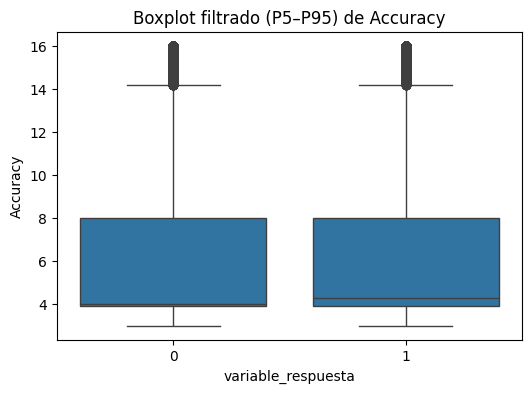

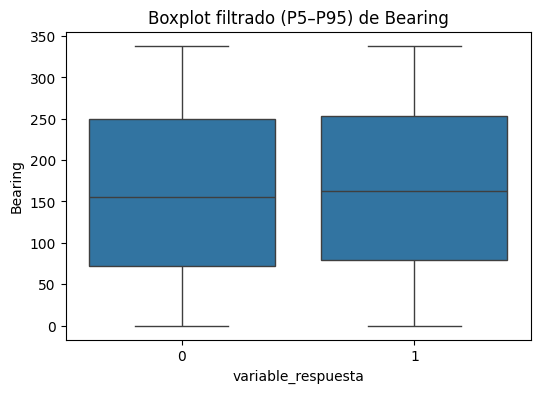

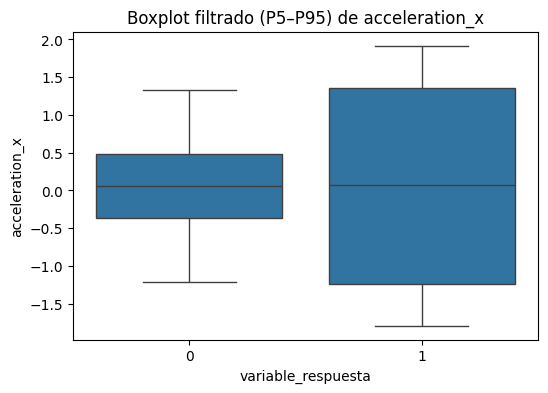

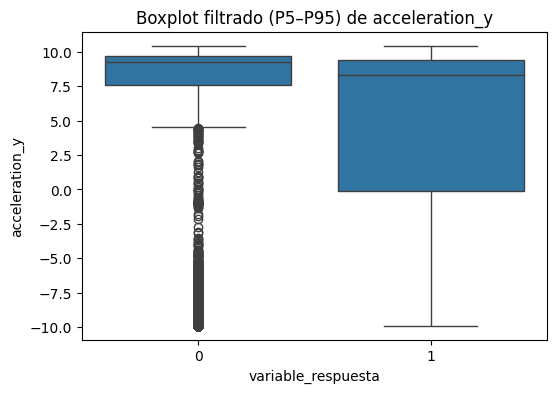

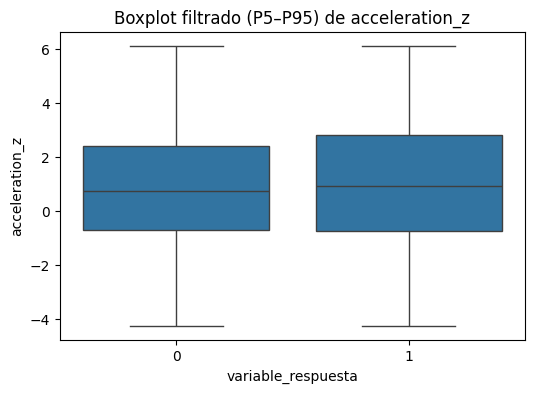

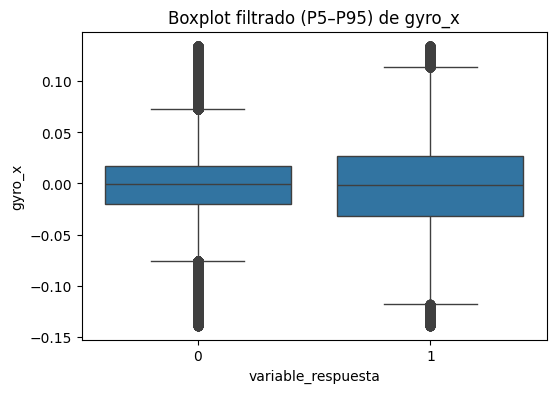

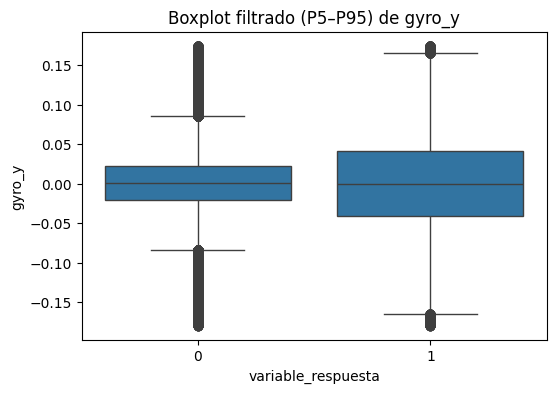

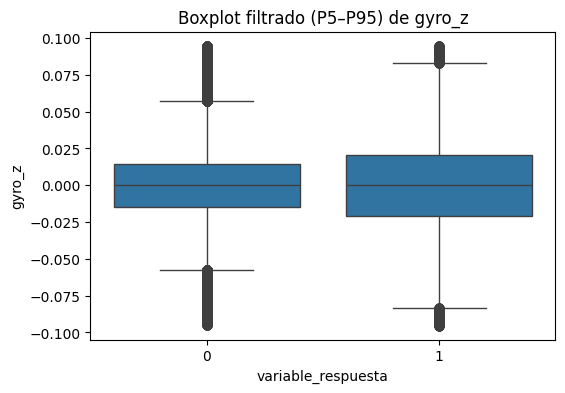

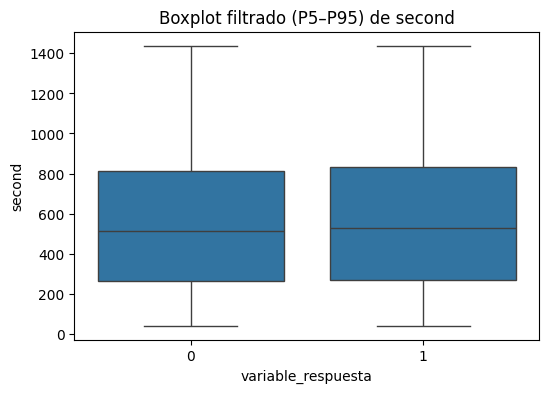

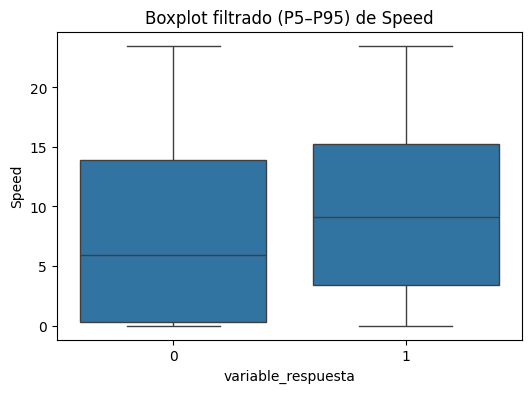

In [37]:
def boxplot_filtered(df, col, target='variable_respuesta'):
    # percentiles
    p5 = df_sample[col].quantile(0.05)
    p95 = df_sample[col].quantile(0.95)

    # filtrar datos sin valores atípicos
    df_filtered = df_sample[(df_sample[col] >= p5) & (df[col] <= p95)]

    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_filtered, x=target, y=col)
    plt.title(f"Boxplot filtrado (P5–P95) de {col}")
    plt.xlabel(target)
    plt.ylabel(col)
    plt.show()
# Lista de variables numéricas
vars_num = [
    'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
    'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 
    'second', 'Speed'
]

# Graficar todas filtradas
for col in vars_num:
    boxplot_filtered(df_sample, col)
    

In [38]:
from sklearn.feature_selection import f_classif


X = df_sample[vars_num]
y = df_sample['variable_respuesta']

f_values, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    'Variable': vars_num,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='p_value')

anova_results



,Variable,F_value,p_value
4,acceleration_z,2565.869976,0.000000e+00
9,Speed,2943.028342,0.000000e+00
1,Bearing,208.653855,2.794745e-47
3,acceleration_y,192.943516,7.455892e-44
0,Accuracy,16.588295,4.644781e-05
2,acceleration_x,14.817535,1.184520e-04
7,gyro_z,2.073433,1.498848e-01
6,gyro_y,0.403706,5.251817e-01
8,second,0.391439,5.315445e-01
5,gyro_x,0.024082,8.766766e-01


         Variable      F_value       p_value
9           Speed  2943.028342  0.000000e+00
4  acceleration_z  2565.869976  0.000000e+00
1         Bearing   208.653855  2.794745e-47
3  acceleration_y   192.943516  7.455892e-44
0        Accuracy    16.588295  4.644781e-05
2  acceleration_x    14.817535  1.184520e-04
7          gyro_z     2.073433  1.498848e-01
6          gyro_y     0.403706  5.251817e-01
8          second     0.391439  5.315445e-01
5          gyro_x     0.024082  8.766766e-01


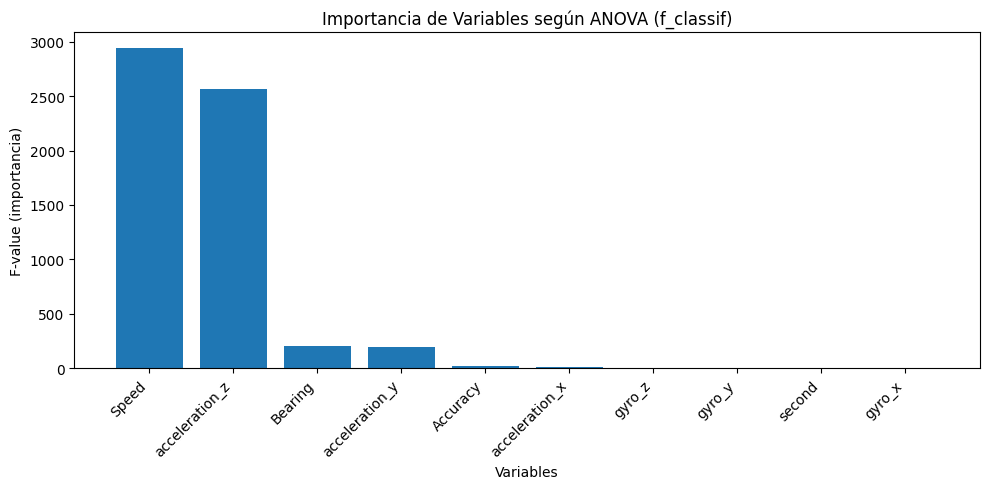

In [41]:


# 1. Selección de variables explicativas
X = df_sample[['Accuracy','Bearing','acceleration_x','acceleration_y','acceleration_z',
        'gyro_x','gyro_y','gyro_z','second','Speed']]

# 2. Variable respuesta
y = df_sample['prob_accidente']

# 3. Ejecutar ANOVA
F_values, p_values = f_classif(X, y)

# 4. Construir DataFrame de resultados
anova_results = pd.DataFrame({
    'Variable': X.columns,
    'F_value': F_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print(anova_results)

# 5. Gráfico de importancia ANOVA
plt.figure(figsize=(10, 5))
plt.bar(anova_results['Variable'], anova_results['F_value'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables")
plt.ylabel("F-value (importancia)")
plt.title("Importancia de Variables según ANOVA (f_classif)")
plt.tight_layout()
plt.show()
